In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import statsmodels.api as sm

### Data Preview

In [3]:
merged_df = pd.read_csv('merged_esg_reddit_data.csv')
merged_df.head(10)

,Company_CSR,reddit_name,avg_sentiment,post_count,e_score,s_score,g_score,total_score
0,boston scientific,boston scientific,0.126595,1.0,3.16,18.00,11.83,32.98
1,boston scientific,boston scientific,0.126595,1.0,2.83,12.86,10.32,26.02
2,extra space storage,extra space storage,0.108850,1.0,3.81,4.28,5.86,13.94
3,archer daniels midland,NaN,NaN,NaN,16.38,14.20,5.90,36.36
4,archer daniels midland,NaN,NaN,NaN,15.89,13.51,5.38,34.78
5,archer daniels midland,NaN,NaN,NaN,15.91,13.49,4.85,34.25
6,best buy,best buy,0.176610,17.0,2.11,5.20,4.60,11.92
7,apple inc.,apple,0.101427,15.0,0.55,13.58,10.47,24.32
8,apple inc.,apple,0.101427,15.0,0.18,7.69,8.86,16.72
9,apple inc.,apple,0.101427,15.0,0.65,6.86,8.95,16.45


In [ ]:
print("Shape:" , merged_df.shape)
print("Columns:", merged_df.columns.tolist())

Shape: (866, 8)
Columns: ['Company_CSR', 'reddit_name', 'avg_sentiment', 'post_count', 'e_score', 's_score', 'g_score', 'total_score']


In [5]:
# Checking for missing values
print("\n📉 Missing Values per Column:")
print (merged_df.isna().sum())


📉 Missing Values per Column:
Company_CSR        0
reddit_name      290
avg_sentiment    290
post_count       290
e_score            0
s_score            0
g_score            0
total_score        0
dtype: int64


In [6]:
#Data types
print("\n🔍 Data Types:")
print(merged_df.dtypes)


🔍 Data Types:
Company_CSR       object
reddit_name       object
avg_sentiment    float64
post_count       float64
e_score          float64
s_score          float64
g_score          float64
total_score      float64
dtype: object


### Descriptive Statistics

In [7]:
print("\n📘 Descriptive Statistics:")
print(merged_df[["avg_sentiment", "e_score", "s_score", "g_score", "total_score"]].describe())


📘 Descriptive Statistics:
       avg_sentiment     e_score     s_score     g_score  total_score
count     576.000000  866.000000  866.000000  866.000000   866.000000
mean        0.108775    5.904134   10.272229    7.423741    23.612240
std         0.050050    5.684071    4.013380    2.532303     7.574159
min        -0.020541    0.010000    1.280000    3.160000     6.990000
25%         0.082738    1.662500    7.542500    5.622500    17.822500
50%         0.105268    3.735000    9.855000    6.820000    22.710000
75%         0.123900    9.027500   12.875000    8.640000    28.760000
max         0.390000   24.840000   26.870000   16.470000    46.510000


### Univariate Analysis (Distributions)

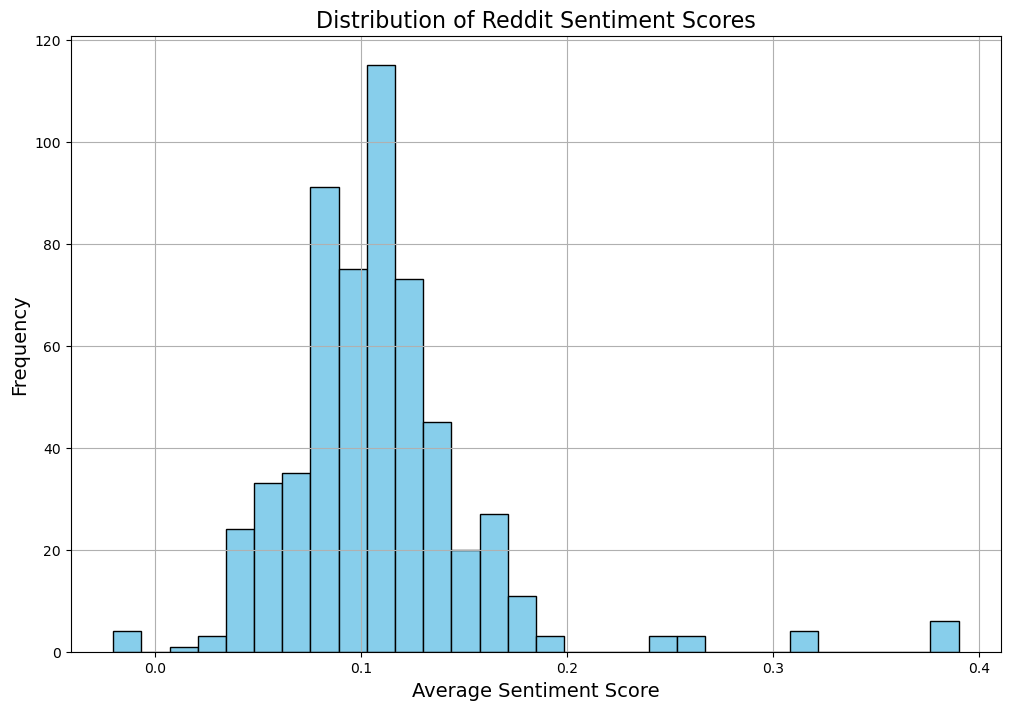

In [8]:
plt.figure(figsize=(12, 8))
merged_df['avg_sentiment'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Reddit Sentiment Scores', fontsize=16)
plt.xlabel('Average Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


### Bivariate Analysis (Correlation Check)

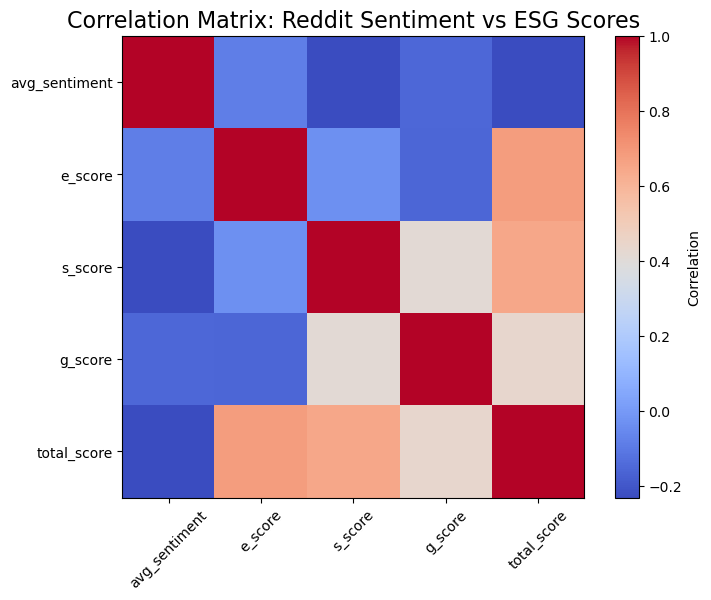

               avg_sentiment   e_score   s_score   g_score  total_score
avg_sentiment       1.000000 -0.082792 -0.231088 -0.152203    -0.226899
e_score            -0.082792  1.000000 -0.029369 -0.158549     0.682293
s_score            -0.231088 -0.029369  1.000000  0.412967     0.645694
g_score            -0.152203 -0.158549  0.412967  1.000000     0.433859
total_score        -0.226899  0.682293  0.645694  0.433859     1.000000


In [9]:
corr = merged_df[['avg_sentiment', 'e_score', 's_score', 'g_score', 'total_score']].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label = "Correlation")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix: Reddit Sentiment vs ESG Scores', fontsize=16)
plt.show()

print(corr)

### Relationship Visualizations

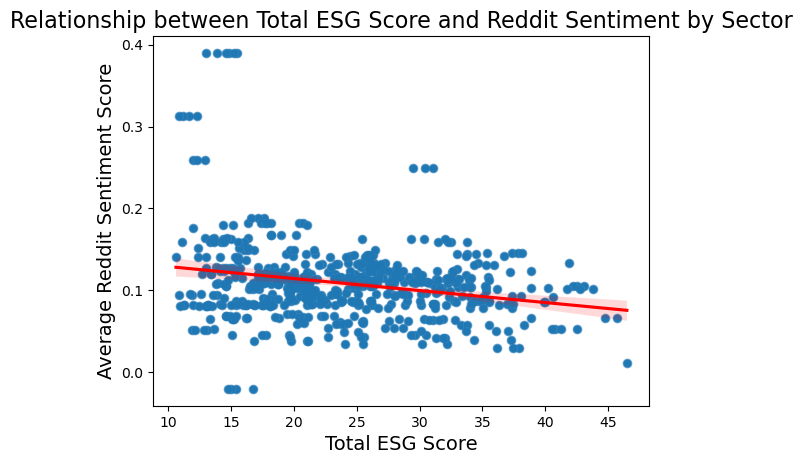

In [17]:
sns.scatterplot(data=merged_df, x='total_score', y='avg_sentiment')
sns.regplot(data=merged_df, x='total_score', y='avg_sentiment', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship between Total ESG Score and Reddit Sentiment by Sector', fontsize=16)
plt.xlabel('Total ESG Score', fontsize=14)
plt.ylabel('Average Reddit Sentiment Score', fontsize=14)   
plt.show()

### Categorical View of Sentiment

sentiment_label
Positive    572
Neutral     290
Negative      4
Name: count, dtype: int64


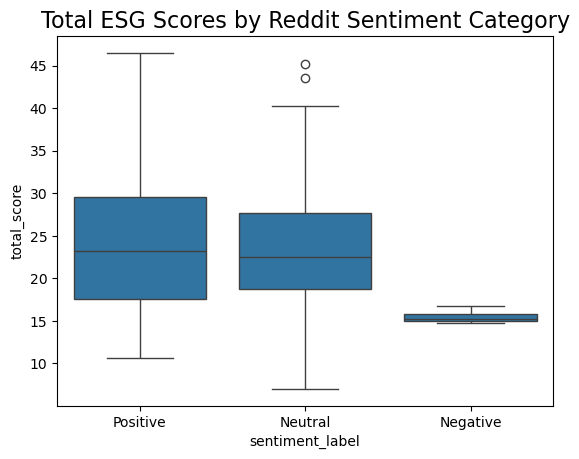

In [21]:
merged_df["sentiment_label"] = merged_df["avg_sentiment"].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
print(merged_df["sentiment_label"].value_counts())

sns.boxplot(data=merged_df, x='sentiment_label', y='total_score')
plt.title('Total ESG Scores by Reddit Sentiment Category', fontsize=16)
plt.show()

## Simple Linear Regression